# Overview

In this collaborative notebook, our group will be combining our three submetrics into a final metric to determine the "bestness" of all of the neighborhoods in Pittsburgh.

# The Metric for "Bestness"

In our separate research, our group came to three separate conclusions.

1. A good neighborhood has a high population density
2. A good neighborhood has a high number of offered social services
3. A good neighborhood has a low number of arrests in its history

Thus, our combined metric is an equation that takes all of these into account. It is represented by:

(Population Density * Number of Social Services) / Number of Arrests

This equation works for our purposes because it will get bigger when the population density or number of social services offered is bigger, and will get smaller when there is a higher number of arrests in the history of the area.

Below is a graph visualizing this. The code written to create the graph combines code from all of our personal notebooks.

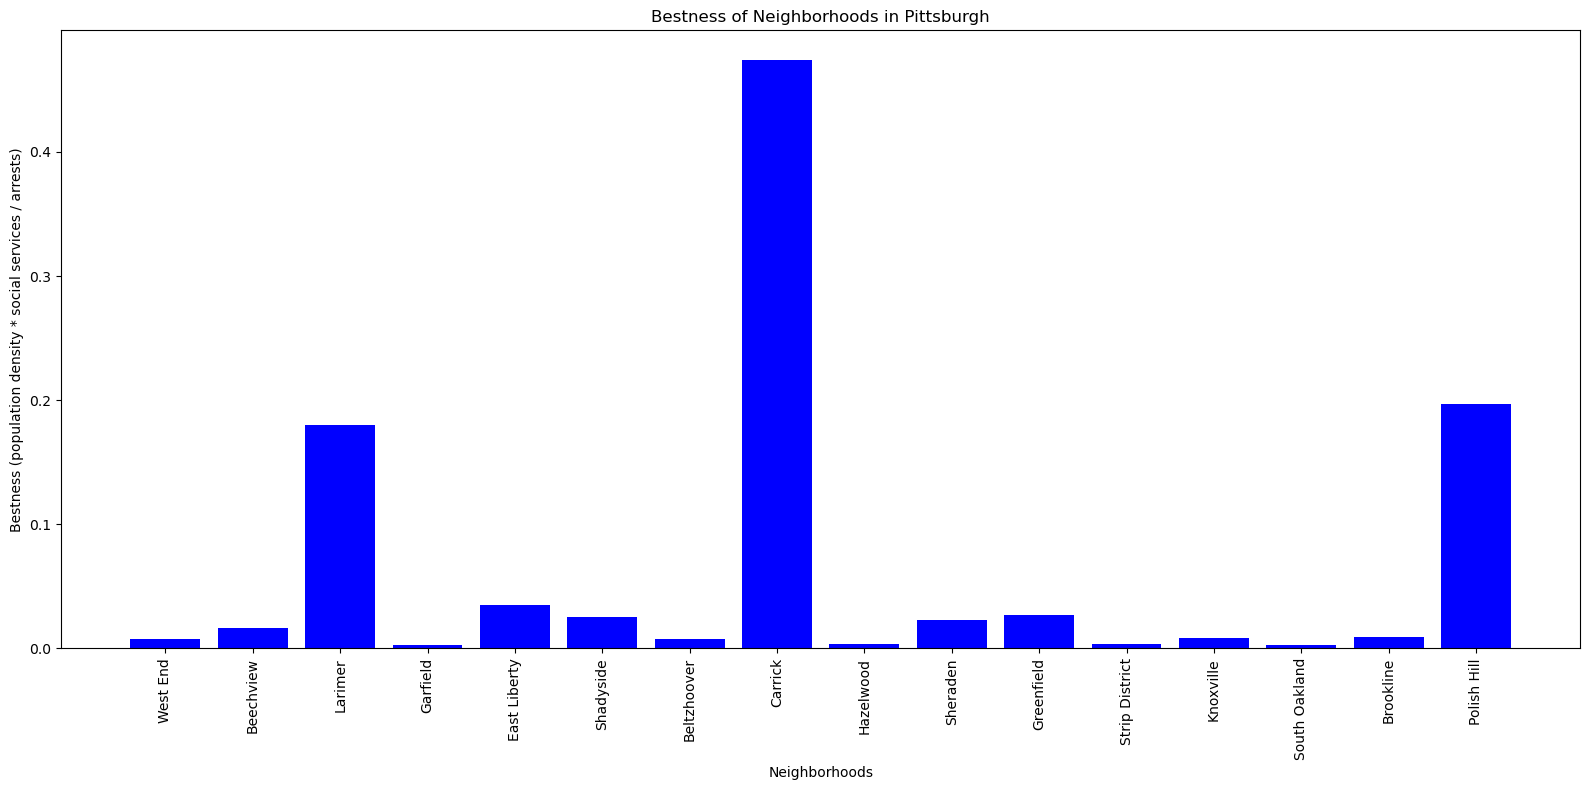

In [38]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Creating population density variable (Jack's code)

neighborhoods_pop = []
populations = []
rawAcreage = []

with open('pop-density-data.csv', 'r') as csvfile_pop:
    csvreader_pop = csv.reader(csvfile_pop)
    next(csvreader_pop)
    for row in csvreader_pop:
        neighborhoods_pop.append(row[1]) 
        populations.append(int(row[3])) 
        rawAcreage.append(float(row[4])) 
        
acreage = [int(x) for x in rawAcreage]

popDense = []
for i in range(len(populations)):
    popDense.append(populations[i] / acreage[i])

# Creating social services variable (River's code)

neighborhoods_soc = []

with open('social-service-data.csv', 'r', encoding="utf8") as csvfile_soc:
    csvreader_soc = csv.reader(csvfile_soc)
    next(csvreader_soc)
    for row in csvreader_soc:
        neighborhoods_soc.append(row[3])

neighborhood_counts = {}
for neighborhood in neighborhoods_soc:
    if neighborhood in neighborhood_counts:
        neighborhood_counts[neighborhood] += 1
    else:
        neighborhood_counts[neighborhood] = 1

# Creating arrest data variable (Nathan's code)

pad = pd.read_csv('police_arrest_data.csv')
adict = dict()

for index, row in pad.iterrows():
    neighborhood = row['INCIDENTNEIGHBORHOOD']
    if neighborhood in adict:
        adict[neighborhood] = adict[neighborhood] + 1
    else:
        adict[neighborhood] = 1
        
neighborhoods_arr = list(adict.keys())
arrests = list(adict.values())

# Combining metrics to create "bestness" variable (Jack's code)

def shared_variables(list1, list2):  
    set1 = set(list1)
    set2 = set(list2)
    shared = list(set1.intersection(set2))
    return shared

shared_neighborhoods_first = shared_variables(neighborhoods_pop, neighborhoods_soc)
shared_neighborhoods = shared_variables(shared_neighborhoods_first, neighborhoods_arr)

def extract_values(list1, list2, list_to_extract):
    shared_indexes = find_shared_indexes(list1, list2)
    shared_values = [list_to_extract[idx] for idx in shared_indexes]
    return shared_values

updated_popDense = extract_values(shared_neighborhoods, neighborhoods_pop, popDense)
updated_arrests = extract_values(shared_neighborhoods, neighborhoods_arr, arrests)
socialCount = [neighborhood_counts[neighborhood] for neighborhood in shared_neighborhoods]

def calculate_bestness(list1, list2, list3):
    multiplied_values = [x * y for x, y in zip(list1, list2)]
    divided_values = [x / y for x, y in zip(multiplied_values, list3)]
    return divided_values

bestness = calculate_bestness(updated_popDense, socialCount, updated_arrests)

# Plotting graph (Jack's code)

plt.figure(figsize=(16, 8)) 
plt.bar(shared_neighborhoods, bestness, color='blue')
plt.xlabel('Neighborhoods')
plt.ylabel('Bestness (population density * social services / arrests)')
plt.title('Bestness of Neighborhoods in Pittsburgh')
plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()

As you might have noticed, the data here has much less neighborhoods than in any of our individual datasets. These we, unfortunately, the only 16 neighborhoods that were represented in all of our data sets.

# The Best Neighborhood

Even though it's pretty obvious already which of these neighborhoods has the highest bestness, we are going to sort the graph above to make it easier to see and more visually appealing. 

Below is an updated version of the code above to create a sorted graph. The added code is marked.

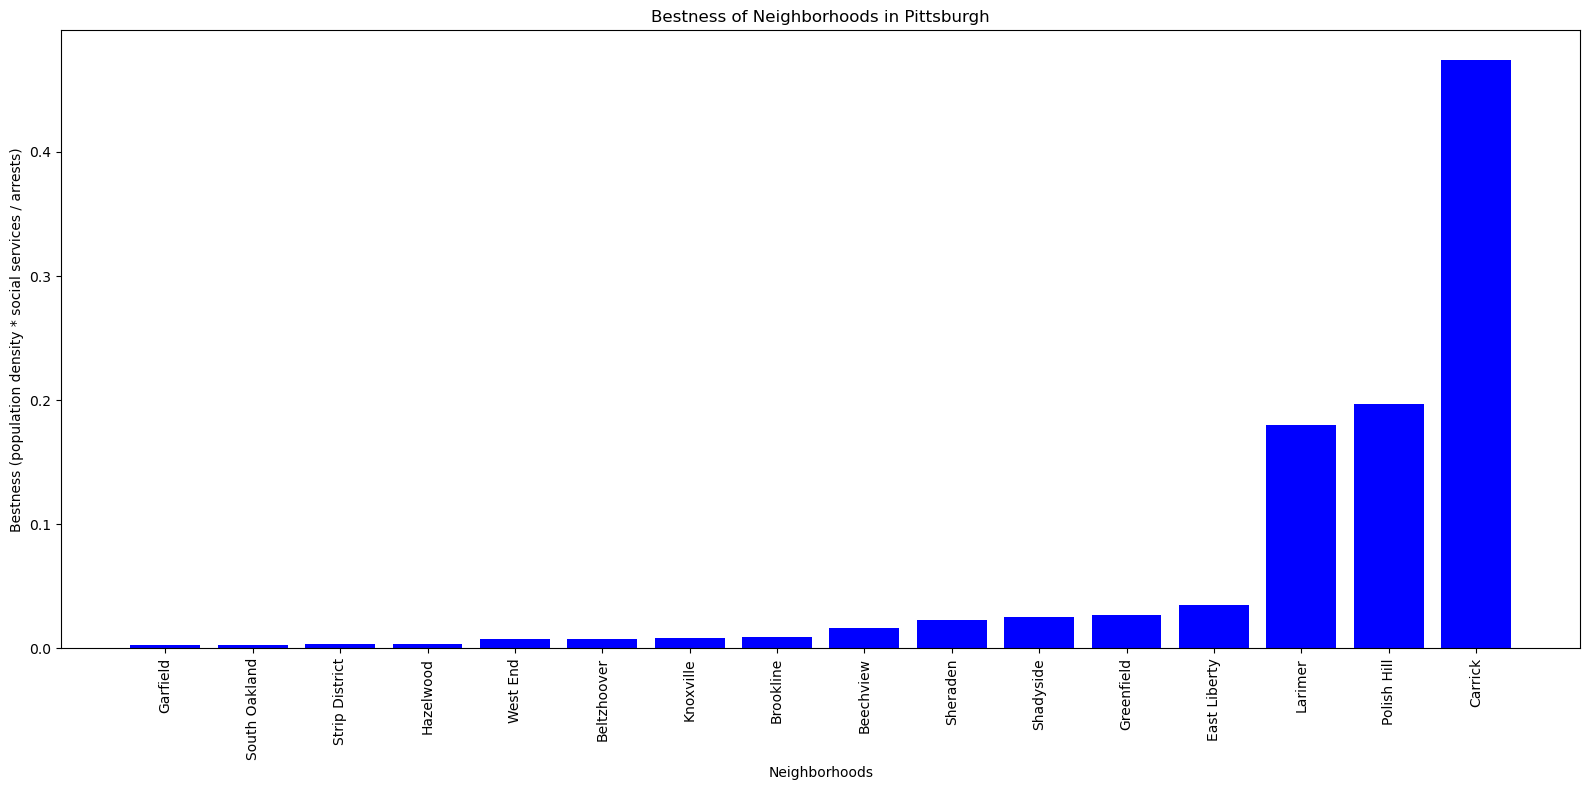

In [37]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating population density variable (Jack's code)

neighborhoods_pop = []
populations = []
rawAcreage = []

with open('pop-density-data.csv', 'r') as csvfile_pop:
    csvreader_pop = csv.reader(csvfile_pop)
    next(csvreader_pop)
    for row in csvreader_pop:
        neighborhoods_pop.append(row[1]) 
        populations.append(int(row[3])) 
        rawAcreage.append(float(row[4])) 
        
acreage = [int(x) for x in rawAcreage]

popDense = []
for i in range(len(populations)):
    popDense.append(populations[i] / acreage[i])

# Creating social services variable (River's code)

neighborhoods_soc = []

with open('social-service-data.csv', 'r', encoding="utf8") as csvfile_soc:
    csvreader_soc = csv.reader(csvfile_soc)
    next(csvreader_soc)
    for row in csvreader_soc:
        neighborhoods_soc.append(row[3])

neighborhood_counts = {}
for neighborhood in neighborhoods_soc:
    if neighborhood in neighborhood_counts:
        neighborhood_counts[neighborhood] += 1
    else:
        neighborhood_counts[neighborhood] = 1

# Creating arrest data variable (Nathan's code)

pad = pd.read_csv('police_arrest_data.csv')
adict = dict()

for index, row in pad.iterrows():
    neighborhood = row['INCIDENTNEIGHBORHOOD']
    if neighborhood in adict:
        adict[neighborhood] = adict[neighborhood] + 1
    else:
        adict[neighborhood] = 1
        
neighborhoods_arr = list(adict.keys())
arrests = list(adict.values())

# Combining metrics to create "bestness" variable (Jack's code)

def shared_variables(list1, list2):  
    set1 = set(list1)
    set2 = set(list2)
    shared = list(set1.intersection(set2))
    return shared

shared_neighborhoods_first = shared_variables(neighborhoods_pop, neighborhoods_soc)
shared_neighborhoods = shared_variables(shared_neighborhoods_first, neighborhoods_arr)

def extract_values(list1, list2, list_to_extract):
    shared_indexes = find_shared_indexes(list1, list2)
    shared_values = [list_to_extract[idx] for idx in shared_indexes]
    return shared_values

updated_popDense = extract_values(shared_neighborhoods, neighborhoods_pop, popDense)
updated_arrests = extract_values(shared_neighborhoods, neighborhoods_arr, arrests)
socialCount = [neighborhood_counts[neighborhood] for neighborhood in shared_neighborhoods]

def calculate_bestness(list1, list2, list3):
    multiplied_values = [x * y for x, y in zip(list1, list2)]
    divided_values = [x / y for x, y in zip(multiplied_values, list3)]
    return divided_values

bestness = calculate_bestness(updated_popDense, socialCount, updated_arrests)

# Sorting data (Jack's code)

sorted_index = np.argsort(bestness)
sorted_neighborhoods = [shared_neighborhoods[i] for i in sorted_index]
sorted_bestness = np.sort(bestness)

# Plotting graph (Jack's code)

plt.figure(figsize=(16, 8)) 
plt.bar(sorted_neighborhoods, sorted_bestness, color='blue')
plt.xlabel('Neighborhoods')
plt.ylabel('Bestness (population density * social services / arrests)')
plt.title('Bestness of Neighborhoods in Pittsburgh')
plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()

Based on the above graph, we can can clearly see that our shared metric defines **Carrick** as the best neighborhood in Pittsburgh.

# Conclusion

Once again, nobody in this group can specify enough that "bestness" is more of a subjective feeling an can never be truly defined with a metric. We cannot in good conscience actually crown Carrick as the best neighborhood in Pittsburgh, even more so now that a good number of the neighborhoods have been taken out of the running simply for not being common among our individual data sets. However, data can help us to understand a lot about the world, and we whole-heartedly respect the assignment we were given and its role in teaching us how to better handle data using code.